### Crreating the data frame


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [59]:
df=pd.read_csv(r'D:\iiitnr\Day17\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Checking nullvalues

In [60]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Check rows and columns

In [61]:
df.shape

(3168, 21)

# Label encoding

In [62]:

from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()
df['label_encoded'] = lebel.fit_transform(df['label'])

X = df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
        'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
        'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']]
y = df['label_encoded']


In [63]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label_encoded, dtype: int64

# Train test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


# 1.> logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred.shape

(2535,)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7846153846153846
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1265
           1       0.77      0.82      0.79      1270

    accuracy                           0.78      2535
   macro avg       0.79      0.78      0.78      2535
weighted avg       0.79      0.78      0.78      2535



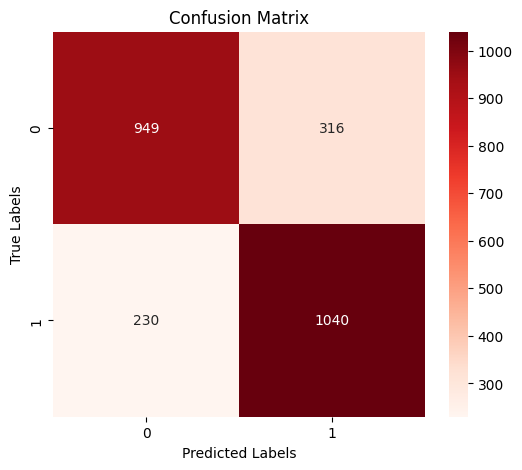

In [73]:


cm = confusion_matrix(y_test, y_pred)
class_names = sorted(list(set(y_test)))  

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN classifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(" KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

 KNN Results:
Accuracy: 0.6568047337278107
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64      1265
           1       0.64      0.71      0.67      1270

    accuracy                           0.66      2535
   macro avg       0.66      0.66      0.66      2535
weighted avg       0.66      0.66      0.66      2535

Confusion Matrix:
 [[767 498]
 [372 898]]


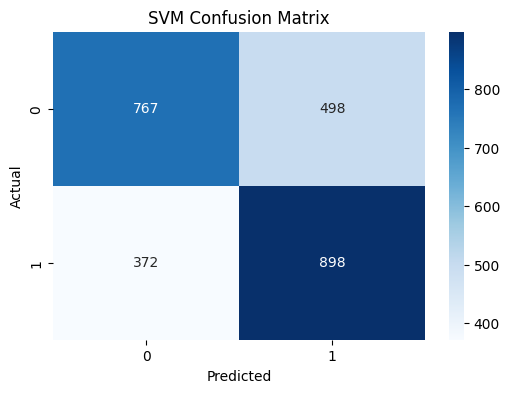

In [76]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM classifier

In [77]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print(" SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

 SVM Results:
Accuracy: 0.8706114398422091
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1265
           1       0.82      0.95      0.88      1270

    accuracy                           0.87      2535
   macro avg       0.88      0.87      0.87      2535
weighted avg       0.88      0.87      0.87      2535

Confusion Matrix:
 [[ 996  269]
 [  59 1211]]


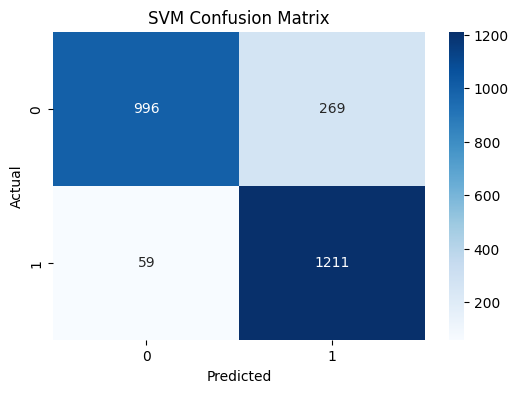

In [78]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [79]:
import librosa
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    features = {}
    
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_flatness = librosa.feature.spectral_flatness(y=y)[0]

    features['meanfreq'] = np.mean(spectral_centroid)
    features['sd'] = np.std(y)
    features['median'] = np.median(y)
    features['Q25'] = np.percentile(y, 25)
    features['Q75'] = np.percentile(y, 75)
    features['IQR'] = features['Q75'] - features['Q25']
    features['skew'] = skew(y)
    features['kurt'] = kurtosis(y)
    features['sp.ent'] = np.log1p(np.sum(np.square(y))) 
    features['sfm'] = np.mean(spectral_flatness)
    
    try:
        features['mode'] = float(np.bincount((y * 100).astype(int)).argmax())
    except:
        features['mode'] = 0

    features['centroid'] = np.mean(spectral_centroid)

    f0, _, _ = librosa.pyin(y, fmin=50, fmax=500, sr=sr)
    f0 = f0[~np.isnan(f0)]
    if len(f0) > 0:
        features['meanfun'] = np.mean(f0)
        features['minfun'] = np.min(f0)
        features['maxfun'] = np.max(f0)
    else:
        features['meanfun'] = features['minfun'] = features['maxfun'] = 0

    fft_spectrum = np.fft.fft(y)
    freq = np.fft.fftfreq(len(fft_spectrum), 1/sr)
    magnitude = np.abs(fft_spectrum)
    peaks, _ = find_peaks(magnitude, height=np.max(magnitude)*0.1)
    dominant_freqs = freq[peaks]
    dominant_freqs = dominant_freqs[dominant_freqs > 0]
    
    if len(dominant_freqs) > 0:
        features['meandom'] = np.mean(dominant_freqs)
        features['mindom'] = np.min(dominant_freqs)
        features['maxdom'] = np.max(dominant_freqs)
        features['dfrange'] = features['maxdom'] - features['mindom']
    else:
        features['meandom'] = features['mindom'] = features['maxdom'] = features['dfrange'] = 0

    
    mean_val = np.mean(y)
    if mean_val != 0:
        modindx = np.std(y) / mean_val
    else:
        modindx = 0
    features['modindx'] = np.clip(modindx, -100, 100)

    return features


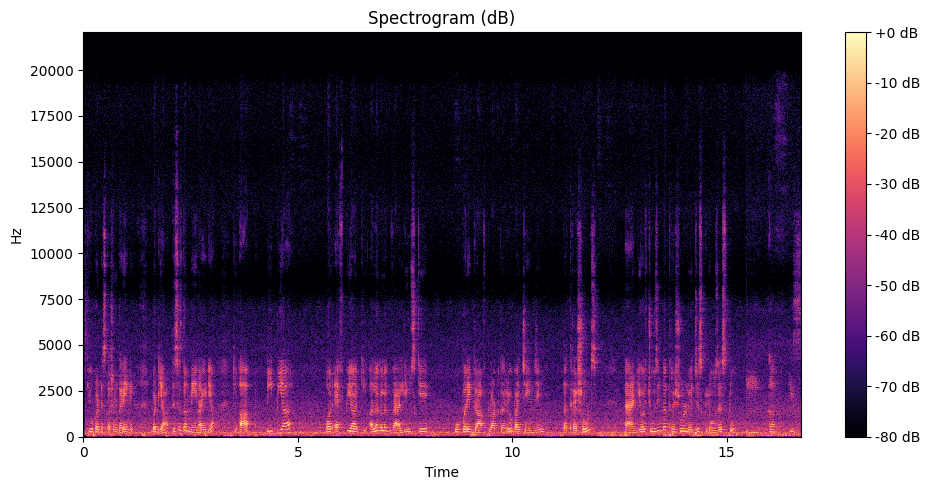

In [92]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(file_path):

    y, sr = librosa.load(file_path, sr=None)

    D = librosa.stft(y)  
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (dB)')
    plt.tight_layout()
    plt.show()

plot_spectrogram("audio.wav")


In [87]:
import pandas as pd

file_path = "audio.wav"

new_features = extract_features(file_path)

ordered_features = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
                    'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
                    'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

X_new = pd.DataFrame([[new_features[feat] for feat in ordered_features]], columns=ordered_features)

predicted_label = model_svm.predict(X_new)[0]

decoded_label = lebel.inverse_transform([predicted_label])[0]

print("🎤 SVM Predicted Label:", decoded_label)


🎤 SVM Predicted Label: female


In [88]:
print(X_new.T)

                    0
meanfreq  1918.656886
sd           0.069240
median       0.000000
Q25         -0.026764
Q75          0.027161
IQR          0.053925
skew        -0.235836
kurt         4.741534
sp.ent       8.170650
sfm          0.002171
mode         0.000000
centroid  1918.656886
meanfun    140.892952
minfun      99.424042
maxfun     240.605007
meandom    494.375051
mindom      35.230713
maxdom    2880.843506
dfrange   2845.612793
modindx   -100.000000


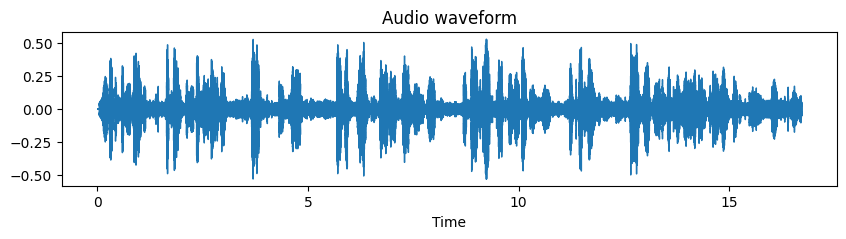

In [89]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(file_path)
plt.figure(figsize=(10, 2))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio waveform")
plt.show()


In [90]:

predicted_label = model_svm.predict(X_new)[0]
decoded_label = lebel.inverse_transform([predicted_label])[0]
print("🎤 Predicted Label:", decoded_label)

probs = model_svm.predict_proba(X_new)
print("🔍 Prediction Confidence:", probs)


🎤 Predicted Label: female
🔍 Prediction Confidence: [[9.9999990e-01 1.0000001e-07]]


In [95]:
file_path = "audio.wav"
features = extract_features(file_path)

for key, value in features.items():
    print(f"{key}: {value}")



mfcc_mean: [-2.8909317e+02  1.7393890e+02 -9.7044477e+00  2.2516199e+01
  2.4589201e+01 -4.6440476e-01 -5.4796476e+00  7.9175925e-01
 -1.4129776e+01  2.1546037e-01 -9.0783978e+00  9.1856247e-01
  4.8836293e+00]
mfcc_std: [43.614258  28.459936  19.486223  20.259237  17.63107   12.040763
 18.320894  11.894309  10.064295  11.2825985  9.602972   8.762411
  8.084411 ]
gfcc_mean: [-741.6579     712.98566    -54.04956    156.42114    201.7167
   -4.325114   -56.187157     8.714066  -163.26143      2.5614002
 -108.94077     10.919903    56.427513 ]
gfcc_std: [111.89077  116.658936 108.529785 140.74191  144.63591  112.13858
 187.85858  130.90819  116.28712  134.12794  115.235664 104.16786
  93.41069 ]
pitch: 1035.1468505859375
spectral_centroid_mean: 1918.65688613019
spectral_centroid_std: 749.9958210660586


In [131]:
import pandas as pd
import os

data = []

directory = r"D:\iiitnr\Day17\voice1"
for file in os.listdir(directory):
    if file.endswith(".wav"):
        file_path = os.path.join(directory, file)
        features = extract_features(file_path)
        label = "male" if "male" in file else "female"
        feature_vector = np.concatenate([
            features['mfcc_mean'], features['mfcc_std'],
            features['gfcc_mean'], features['gfcc_std'],
            [features['pitch']],
            [features['spectral_centroid_mean']],
            [features['spectral_centroid_std']]
        ])
        data.append([*feature_vector, label])


columns = [f"f{i}" for i in range(len(data[0])-1)] + ["label"]
df = pd.DataFrame(data, columns=columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])  #


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from 

In [147]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: The number of classes has to be greater than one; got 1 class

In [144]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: The number of classes has to be greater than one; got 1 class